In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Scaling :-

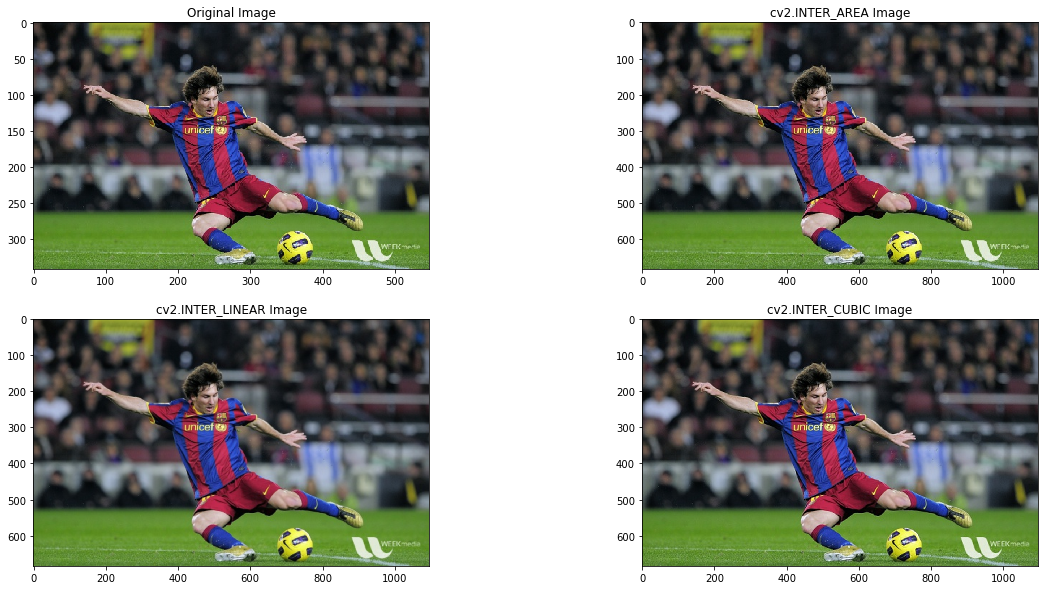

In [2]:
img = cv2.imread('images/messi5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

res1 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_AREA)

res2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

res3 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0,0].imshow(img)
ax[0,0].set_title("Original Image")
ax[0,1].imshow(res1)
ax[0,1].set_title("cv2.INTER_AREA Image")
ax[1,0].imshow(res2)
ax[1,0].set_title("cv2.INTER_LINEAR Image")
ax[1,1].imshow(res3)
ax[1,1].set_title("cv2.INTER_CUBIC Image")
plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**

# Translation :-
It will slide the image according to M Parameter which we will be providing to cv2.warpAffine() function.

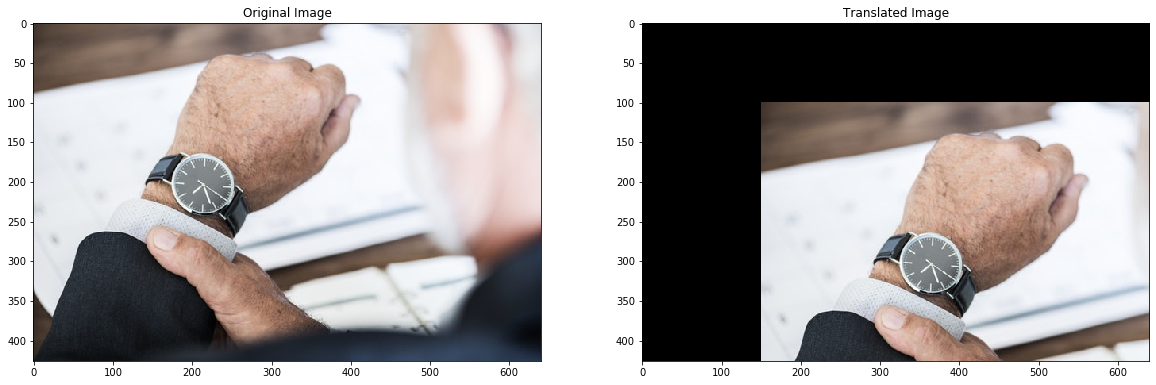

In [3]:
img = cv2.imread("images/watch.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows, cols = img.shape[:2]

"""M is the value of object to be translated from image."""
M = np.float32([[1,0,150], [0, 1,100]])

"""dsize means the size of output image & it should be equal to original image so used it's rows & cols."""
img1 = cv2.warpAffine(img, M, (cols,rows))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title("Original Image")
ax2.imshow(img1)
ax2.set_title("Translated Image")
plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**

# Rotation :-

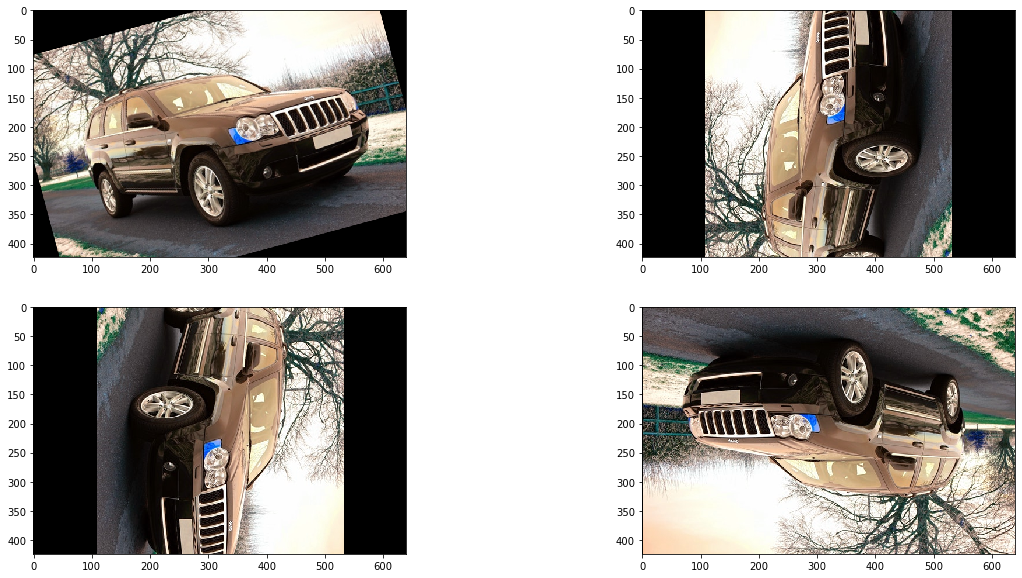

In [4]:
img = cv2.imread("images/jeep1.jpeg")

rows,cols = img.shape[:2]

# getRotationMatrix2D(center, angle, scale)
# scale when 1 will rotate the image towards left & when -1 will rotate the image towards right.
x = cv2.getRotationMatrix2D((cols/2, rows/2), 15, 1) 

# warpAffine(src(image variable), M(Rotated 2D Matrix), dsize(Size of the output image))
tilt_img = cv2.warpAffine(img, x, (cols, rows))

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows)) 

M1 = cv2.getRotationMatrix2D((cols/2,rows/2),90,-1)
dst1 = cv2.warpAffine(img,M1,(cols,rows))

M2 = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
dst2 = cv2.warpAffine(img,M2,(cols,rows))

f , ax = plt.subplots(2,2,figsize=(20,10))
ax[0,0].imshow(tilt_img)
ax[0,1].imshow(dst)
ax[1,0].imshow(dst1)
ax[1,1].imshow(dst2)
plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**

# Adaptive Thresholding :-

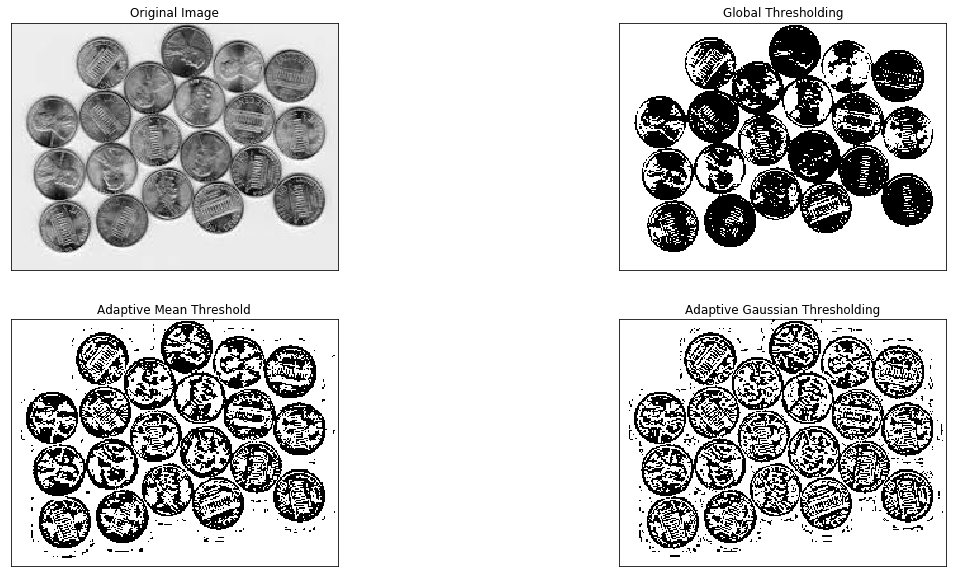

In [5]:
gray_image = cv2.imread('images/coins.jpg',0)

ret,thresh_global = cv2.threshold(gray_image,140,170,cv2.THRESH_BINARY)

# Here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])

plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**

# Image Contours :-

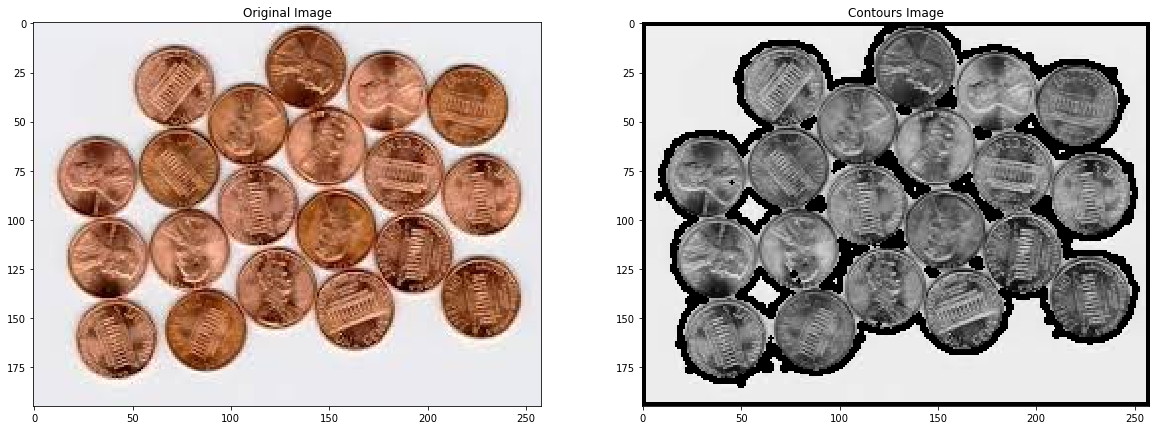

In [6]:
# Contours simply means a curve made by joinning various continuous points.
"""Image Contours works best on Binary Images(Gray) & so we should first apply Thresholding techniques, sobel edges, etc.."""

image = cv2.imread('images/coins.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 

# Thresholding Image {thresh = 220, becoz we only want to find out the shapes in our images.}
ret,thresh = cv2.threshold(gray_image, 220, 255, 0)

#calculate the contours from binary image
im,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
get_contours = cv2.drawContours(gray_image, contours, -1,(0, 255, 0), 2) 

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(get_contours, cmap="gray")
ax[1].set_title("Contours Image")
plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**

# Scale Invariant Feature Transform (SIFT)
If followning code gives this error -> **AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'**, then run follwong 2 commands :-<br>
!pip install opencv-python==3.4.2.17 --user<br>
!pip install opencv-contrib-python==3.4.2.17 --user

We found 398 number of Keypoints in this image


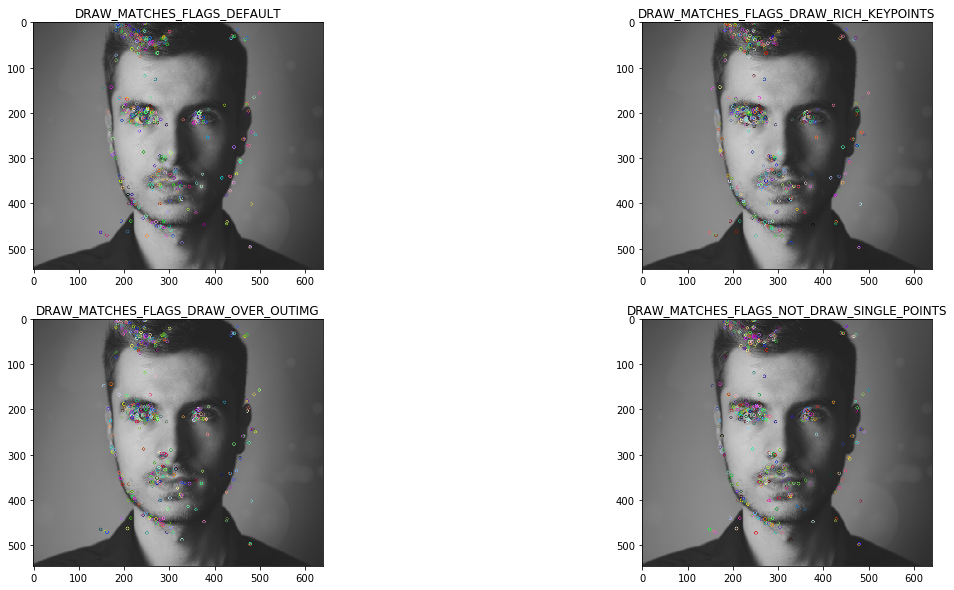

In [26]:
image = cv2.imread('images/man.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Create SIFT object(nfeatures=(max no. of keypoints to detect),nOctaveLayers=(the high the value moe the keypoints will be))
sift  = cv2.xfeatures2d.SIFT_create(500,10)
# Calculate keypoints and their orientation
keypoints,descriptors = sift.detectAndCompute(gray,None)
print("We found {} number of Keypoints in this image".format(len(keypoints)))
# Plot Keypoints on the image :-
"""
There are 4 styles to draw Keypoints on Image namely :-
1. cv2.DRAW_MATCHES_FLAGS_DEFAULT
2. cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
3. cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
4. cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
"""
with_keypoints = cv2.drawKeypoints(gray,keypoints,outImage=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
with_keypoints1 = cv2.drawKeypoints(gray,keypoints,outImage=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
with_keypoints2 = cv2.drawKeypoints(gray,keypoints,outImage=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
with_keypoints3 = cv2.drawKeypoints(gray,keypoints,outImage=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0,0].imshow(with_keypoints)
ax[0,0].set_title("DRAW_MATCHES_FLAGS_DEFAULT")
ax[0,1].imshow(with_keypoints1)
ax[0,1].set_title("DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS")
ax[1,0].imshow(with_keypoints2)
ax[1,0].set_title("DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG")
ax[1,1].imshow(with_keypoints3)
ax[1,1].set_title("DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS")
plt.show()

**X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X==X**

# Speeded-Up Robust Features (SURF)

We found 706 number of Keypoints in this image


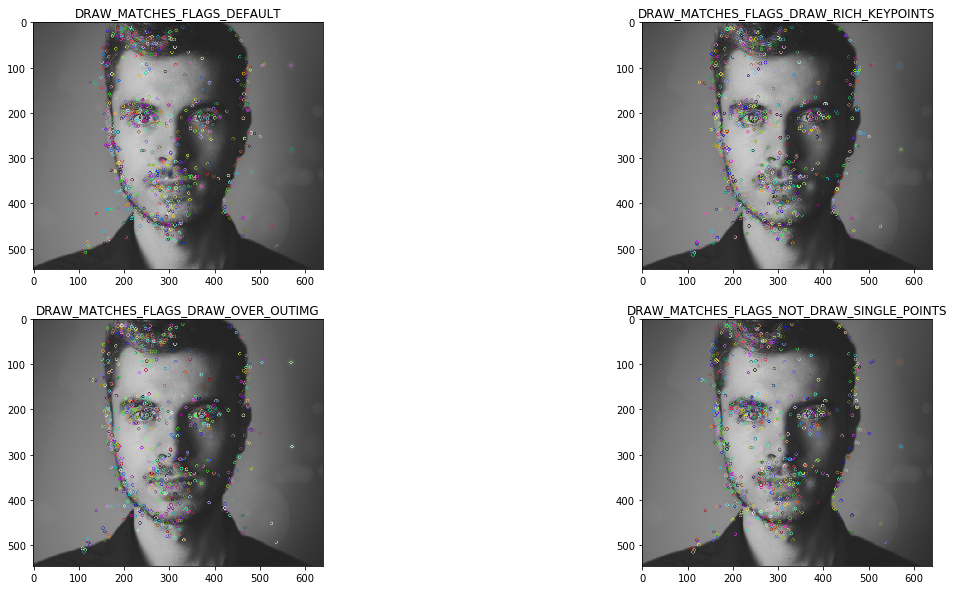

In [19]:
image = cv2.imread("images/man.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create SURF object(hessianThreshold=(the less the value more the keypoints will be there), nOctaves=(the high the value the more keypoints there will be))
surf = cv2.xfeatures2d.SURF_create(50,10)
# Calculate Keypoints & their orientation
keypoints, descriptors = surf.detectAndCompute(gray, None)
print("We found {} number of Keypoints in this image".format(len(keypoints)))
# Plot Keypoints on the image :-
"""
There are 4 styles to draw Keypoints on Image namely :-
1. cv2.DRAW_MATCHES_FLAGS_DEFAULT
2. cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
3. cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
4. cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
"""
with_keypoints = cv2.drawKeypoints(gray, keypoints, outImage=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
with_keypoints1 = cv2.drawKeypoints(gray, keypoints, outImage=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
with_keypoints2 = cv2.drawKeypoints(gray, keypoints, outImage=cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
with_keypoints3 = cv2.drawKeypoints(gray, keypoints, outImage=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0,0].imshow(with_keypoints)
ax[0,0].set_title("DRAW_MATCHES_FLAGS_DEFAULT")
ax[0,1].imshow(with_keypoints1)
ax[0,1].set_title("DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS")
ax[1,0].imshow(with_keypoints2)
ax[1,0].set_title("DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG")
ax[1,1].imshow(with_keypoints3)
ax[1,1].set_title("DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS")
plt.show()

![title](images/thank_you2.png "Header")